# Importando e exibindo os dados

The data used in this project is from Kaggle datasets, available in the page: https://www.kaggle.com/datasets/dev0914sharma/customer-clustering

We are the oners of a supermarket mall and through membership card, we have some basic data about our costumers. In this project we intend to separate the clients into groups that share similar characteristics. In this way we can identify unsatisfied costumers need.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataframe=pd.read_csv('segmentation data.csv')
dataframe.drop(['ID'], axis=1, inplace=True)
dataframe.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 109.5 KB


In [4]:
dataframe.isnull().sum()

Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [5]:
dataframe.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


array([[<Axes: title={'center': 'Sex'}>,
        <Axes: title={'center': 'Marital status'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Occupation'}>],
       [<Axes: title={'center': 'Settlement size'}>, <Axes: >, <Axes: >]],
      dtype=object)

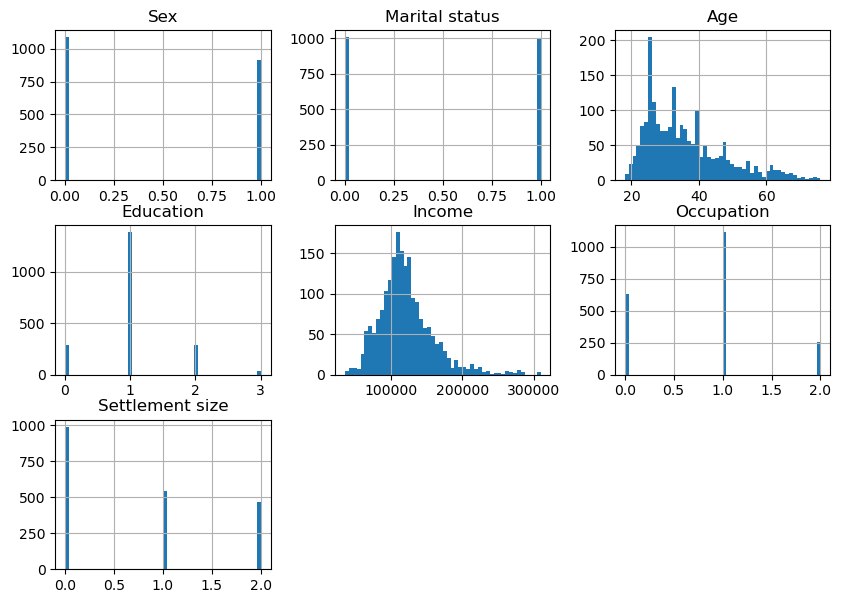

In [6]:
dataframe.hist(bins=50, figsize=(10,7))

Our continuous varable, age and  income have near a gaussian shape with a with a positive skew. The variables Sex and Marital status are equally distributed. On the other hand, the data is not equally distributed between the kinds of education, the kinds of Occupation and the kinds of Settlement_size, let's take a look at it:

In [7]:
print('other/ unknown: ', dataframe[dataframe['Education']==0]['Education'].count()/len(dataframe['Education'])*100)
print('high school: ', dataframe[dataframe['Education']==1]['Education'].count()/len(dataframe['Education'])*100)
print('university', dataframe[dataframe['Education']==2]['Education'].count()/len(dataframe['Education'])*100)
print('graduate school', dataframe[dataframe['Education']==3]['Education'].count()/len(dataframe['Education'])*100)

other/ unknown:  14.35
high school:  69.3
university 14.549999999999999
graduate school 1.7999999999999998


In [8]:
print('unemployed / unskilled: ', dataframe[dataframe['Occupation']==0]['Occupation'].count()/len(dataframe['Occupation'])*100)
print('skilled employee / official: ', dataframe[dataframe['Occupation']==1]['Occupation'].count()/len(dataframe['Occupation'])*100)
print('management / self-employed / highly qualified employee / officer: ', dataframe[dataframe['Occupation']==2]['Occupation'].count()/len(dataframe['Occupation'])*100)

unemployed / unskilled:  31.65
skilled employee / official:  55.65
management / self-employed / highly qualified employee / officer:  12.7


In [9]:
print('small city: ', dataframe[dataframe['Settlement size']==0]['Settlement size'].count()/len(dataframe['Settlement size'])*100)
print('mid-sized city: ', dataframe[dataframe['Settlement size']==1]['Settlement size'].count()/len(dataframe['Settlement size'])*100)
print('big city: ', dataframe[dataframe['Settlement size']==2]['Settlement size'].count()/len(dataframe['Settlement size'])*100)

small city:  49.45
mid-sized city:  27.200000000000003
big city:  23.35


# Feature Scaling

We don't want the scale of our data to influence the imprtance of a given feature, then we use MinMaxScaler to normalise our data.

In [10]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1))
DataScalling = min_max_scaler.fit_transform(dataframe)

In [11]:
colunas = dataframe.columns
colunas

Index(['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation',
       'Settlement size'],
      dtype='object')

In [12]:
DataFrameScaling=pd.DataFrame(data= DataScalling, columns=colunas, index = dataframe.index)
DataFrameScaling. head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0.0,0.0,0.844828,0.666667,0.324781,0.5,1.0
1,1.0,1.0,0.068966,0.333333,0.420210,0.5,1.0
2,0.0,0.0,0.534483,0.333333,0.195144,0.0,0.0
3,0.0,0.0,0.465517,0.333333,0.496223,0.5,0.5
4,0.0,0.0,0.603448,0.333333,0.413842,0.5,0.5


# Defining the number of Clusters

## SSE metric

Let's use the SSE metric (Error Sum of Squares) that calculate the square of the distance between each point and the centroide and sum everything! That is, it measures how distant the points in the same cluster are from each other. As spread the clusters are, bigger is the error. We whant the minimum value of SSE that forms a knee in the graphic.

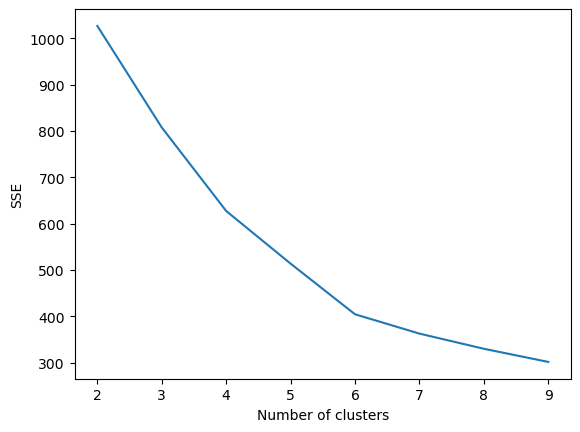

In [13]:
from sklearn.cluster import KMeans

sse = {}

# We are going to use the metrics SSE varing from 1 to 9 clusters
for num_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000, random_state=0, n_init=10).fit(DataFrameScaling.loc[:, colunas].values)

    # Inertia: Sum of the distances between the observations
    # and the center of the cluster
    sse[num_clusters] = kmeans.inertia_ 
    
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

## Silhouette

The silhouette coefficient can be used to study the separation distance between the resulting clusters. It has the range of (-1, 1). The closer the silhouette value is to 1, the more separated the clusters are. We want to maximize this value.

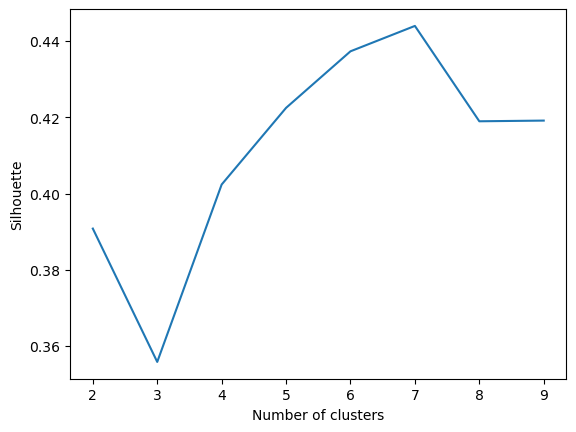

In [14]:
from sklearn.metrics import silhouette_score

selh = {}

# We are going to use the metrics SSE varing from 2 to 9 clusters
for num_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000, random_state=0, n_init=10).fit(DataFrameScaling.loc[:, colunas])

    # Inertia: Sum of the distances between the observations
    # and the center of the cluster
    selh[num_clusters] = silhouette_score(DataFrameScaling.loc[:, colunas], kmeans.labels_, metric='euclidean')
    
plt.figure()
plt.plot(list(selh.keys()), list(selh.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette")
plt.show()

From the nformation in the SSE graphic the best number of clusters is 6 and from the information of the silhouette the best number of clusters is 7. Although, The value for the silhouette for 7 clusters are near the value for 6 clusters. Than, we estimate that the best numer of clusters are 6.

In [15]:
kmeans = KMeans(n_clusters=6, max_iter=1000, random_state=0, n_init=10).fit(DataFrameScaling)

# Incluindo a informação de qual cluster cada observação pertence
dataframe['clusters'] = kmeans.labels_
dataframe.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,clusters
0,0,0,67,2,124670,1,2,3
1,1,1,22,1,150773,1,2,0
2,0,0,49,1,89210,0,0,1
3,0,0,45,1,171565,1,1,3
4,0,0,53,1,149031,1,1,3


# Analise dos atributos

The variances between the centroides of each cluster for a feature indicates how much the feature is important in the split of the clusters. In the next two steps we extract the centroides of he cluster for each feature and use this value to calculate the variances.

In [16]:
centroids = kmeans.cluster_centers_
print(centroids)

[[ 1.00000000e+00  1.00000000e+00  2.80764030e-01  4.44444444e-01
   3.68164246e-01  5.91503268e-01  6.76470588e-01]
 [ 3.88578059e-16  1.33226763e-15  3.37336124e-01  2.46006390e-01
   2.44762293e-01  1.85303514e-01  3.03514377e-02]
 [ 1.00000000e+00  1.00000000e+00  2.48556536e-01  4.03875969e-01
   2.42422578e-01  2.13953488e-01  5.81395349e-03]
 [ 2.55351296e-15  1.72084569e-15  3.79443999e-01  2.73901809e-01
   4.00295405e-01  6.32751938e-01  7.66472868e-01]
 [ 1.00000000e+00  1.49880108e-15  2.95621852e-01  3.10861423e-01
   2.27268625e-01  1.85393258e-01  3.65168539e-02]
 [-3.88578059e-16  1.00000000e+00  2.75325372e-01  4.22827497e-01
   3.18590599e-01  4.66926070e-01  4.59143969e-01]]


In [17]:
max =len(centroids[0])
for i in range(max):
    print(DataFrameScaling.columns.values[i], '\n{:.4f}'.format(centroids[:, i].var()))

Sex 
0.2500
Marital status 
0.2500
Age 
0.0019
Education 
0.0059
Income 
0.0045
Occupation 
0.0366
Settlement size 
0.1014


From the result above we conclude that the most important Features are:

Sex: var = 0.2494

Marital status: var = 0.2500

Occupation: var = 0.0381

Settlement size: var = 0.1009

We criate new classes in order to separate each possible result in different columns:

In [18]:
dataframe['Occupation_0'] = dataframe['Occupation'].apply(lambda x: 1 if x==0 else 0)
dataframe['Occupation_1'] = dataframe['Occupation'].apply(lambda x: 1 if x==1 else 0)
dataframe['Occupation_2'] = dataframe['Occupation'].apply(lambda x: 1 if x==2 else 0)

dataframe['Settlement_size_0'] = dataframe['Settlement size'].apply(lambda x: 1 if x==0 else 0)
dataframe['Settlement_size_1'] = dataframe['Settlement size'].apply(lambda x: 1 if x==1 else 0)
dataframe['Settlement_size_2'] = dataframe['Settlement size'].apply(lambda x: 1 if x==2 else 0)

In [19]:
 dataframe.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,clusters,Occupation_0,Occupation_1,Occupation_2,Settlement_size_0,Settlement_size_1,Settlement_size_2
0,0,0,67,2,124670,1,2,3,0,1,0,0,0,1
1,1,1,22,1,150773,1,2,0,0,1,0,0,0,1
2,0,0,49,1,89210,0,0,1,1,0,0,1,0,0
3,0,0,45,1,171565,1,1,3,0,1,0,0,1,0
4,0,0,53,1,149031,1,1,3,0,1,0,0,1,0


Now, all of our features are 0 or 1, we can calculate the percentage each characteristic represent in the cluster.

In [20]:
description=dataframe.groupby('clusters')[['Sex', 'Marital status', 'Occupation_0', 'Occupation_1', 'Occupation_2',
                                        'Settlement_size_0', 'Settlement_size_1', 'Settlement_size_2']]

description2 = description.mean()*100
n_clients = description.size() 
description2['n_clients']= n_clients

print(description2)

            Sex  Marital status  Occupation_0  Occupation_1  Occupation_2  \
clusters                                                                    
0         100.0           100.0      0.653595     80.392157     18.954248   
1           0.0             0.0     64.217252     34.504792      1.277955   
2         100.0           100.0     57.209302     42.790698      0.000000   
3           0.0             0.0      1.937984     69.573643     28.488372   
4         100.0             0.0     64.044944     34.831461      1.123596   
5           0.0           100.0     23.346304     59.922179     16.731518   

          Settlement_size_0  Settlement_size_1  Settlement_size_2  n_clients  
clusters                                                                      
0                  1.633987          61.437908          36.928105        306  
1                 93.929712           6.070288           0.000000        313  
2                 98.837209           1.162791           0.000000  

CLUSTER 0: Married women. They are anemployed or skilled employee living in a small city.

CLUSTER 1: Single men. The majority of them are skilled employee living in a mid-size or big city.

CLUSTER 2: Maried women. The majority of them are skilled employee living in a mid-size or big city.

CLUSTER 3: Single women. The majority of them are anemployed living in a small city.

CLUSTER 4: Married men. The majority of them are skilled employee  living in small, mid-sized and big citys.

CLUSTER 5: Single men. The majority of them are anemployed living in a small city.